<a href="https://colab.research.google.com/github/BrunoFUAL/modelos_previsao/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Descrição: Este programa utiliza inteligencia artificial através de redes neuronais 
#Long Short Term Memory (LSTM) para prever o preço de fecho de uma ação (neste caso a Apple), utilizando
#os preços dos ultimos 60 dias

#LSTM - rede neuronal utilizada no deep learning
#LSTM é capaz de armazenar a informação importante e "esquecer" a que não é importante


In [1]:
#Importar as bibliotecas
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:

!pip install yfinance
import yfinance as yf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 6.4 MB 47.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
#Efetuar o download do dataset
df = yf.download('AAPL', period='10y')

#Mostrar o dataset

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-29,20.389286,20.500000,20.189644,20.438213,17.475040,380508800
2012-05-30,20.328571,20.713928,20.234285,20.684643,17.685740,529429600
2012-05-31,20.740713,20.767857,20.409286,20.633215,17.641773,491674400
2012-06-01,20.327143,20.451786,20.018572,20.035357,17.130594,520987600
2012-06-04,20.053572,20.267857,19.589287,20.153214,17.231361,556995600
...,...,...,...,...,...,...
2022-05-23,137.789993,143.259995,137.649994,143.110001,143.110001,117726300
2022-05-24,140.809998,141.970001,137.330002,140.360001,140.360001,104132700
2022-05-25,138.429993,141.789993,138.339996,140.520004,140.520004,92482700


In [6]:
#Contabilizar o numero de volunas e linhas no dataset
df.shape

(2518, 6)

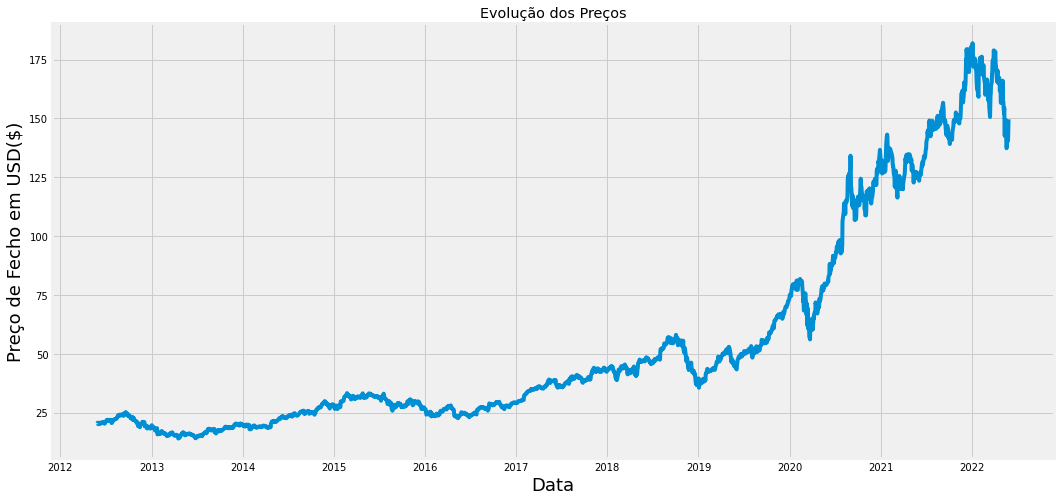

In [8]:
#Visualizar o preço de fecho de sessão
plt.figure(figsize=(16,8))
plt.title('Evolução dos Preços')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Preço de Fecho em USD($)', fontsize=18 )
plt.show()

In [9]:
#Criar um novo dataset com apenas a coluna de Preço de Fecho

data = df.filter(['Close'])

#Converter o dataset num array em numpy

dataset = data.values

#Obter o numero de linhas para treinar o modelo

training_data_len = math.ceil(len(dataset) *.8)
training_data_len

2015

In [10]:
#Atribuir a escala aos dados, de forma a normalizar a informação

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03862083],
       [0.04008713],
       [0.03978112],
       ...,
       [0.75312761],
       [0.77252512],
       [0.80739311]])

In [12]:
#Criar o dataset de treino
#Criar o dataset de traino com a escala correta

train_data = scaled_data[0:training_data_len, :]

#Dividir os dados entre x_train (variaveis independentes) e y_train (variavel dependente)

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()



[array([0.03862083, 0.04008713, 0.03978112, 0.03622376, 0.03692503,
       0.03661477, 0.03844871, 0.03850396, 0.04033151, 0.03838709,
       0.03944748, 0.03859746, 0.03846358, 0.0390161 , 0.04149179,
       0.04183818, 0.0414833 , 0.03976837, 0.04070977, 0.03830208,
       0.03856984, 0.03909472, 0.03793656, 0.04111353, 0.04292408,
       0.04438824, 0.04662594, 0.04576316, 0.04746533, 0.04625831,
       0.04545503, 0.04427987, 0.04556978, 0.04598205, 0.04598843,
       0.04584392, 0.04755672, 0.04542741, 0.04532753, 0.04470914,
       0.0391946 , 0.03917548, 0.04136004, 0.04345748, 0.04680019,
       0.04596079, 0.04616905, 0.04784998, 0.04930564, 0.04895713,
       0.048734  , 0.04891887, 0.04912501, 0.05088881, 0.05124794,
       0.05106518, 0.0522361 , 0.05473729, 0.0583584 , 0.05642671])]
[0.05914891317753268]

[array([0.03862083, 0.04008713, 0.03978112, 0.03622376, 0.03692503,
       0.03661477, 0.03844871, 0.03850396, 0.04033151, 0.03838709,
       0.03944748, 0.03859746, 0.03

In [13]:
#Converter o x_train e y_train para arrays numpy

x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
#Reformular os dados
#O LSTM espera um dataset tridimensional pelo que teremos de o alterar pois atualmente é apenas bidimensional
#a terceira dimensão = 1 (Closing Price)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1 ))
x_train.shape


(1955, 60, 1)

In [17]:
#Construir o modelo LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [18]:
#Compilar o modelo

model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
#Treinar o modelo

model.fit(x_train, y_train, batch_size=1, epochs=1)

1955/1955 [==============================] - 47s 22ms/step - loss: 2.5979e-04


In [20]:
#Criar o dataset de teste
#Criar um novo array que contém os valores desde o 1955 ate 2518

test_data = scaled_data[training_data_len-60: , :]

#Criar os dataset x_test e y_test

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [21]:

#Converter os dados num array numpy

x_test = np.array(x_test)

In [22]:
#Reformular os dados

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
#Obter os valores previstos pelo modelo
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [24]:
#Obter o Root Mean Squared Error (RMSE) => standard desviations from the residuals, quanto menor melhor

rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.485893971123378

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


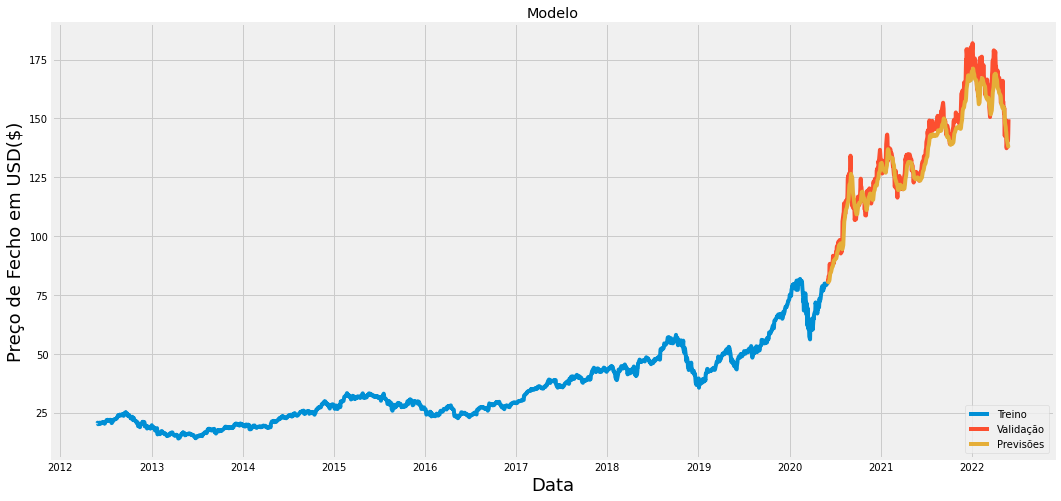

In [26]:
#Mostrar o gráfico com os dados

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Previsões'] = predictions

#Visualiar
plt.figure(figsize=(16,8))
plt.title('Modelo')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Preço de Fecho em USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Previsões']])
plt.legend(['Treino', 'Validação', 'Previsões'], loc='lower right')
plt.show()



In [27]:
#Mostrar o preço previsto vs preço real

valid

,Close,Previsões
Date,,
2020-06-02,80.834999,79.736252
2020-06-03,81.279999,79.998787
2020-06-04,80.580002,80.322006
2020-06-05,82.875000,80.544868
2020-06-08,83.364998,80.988113
...,...,...
2022-05-23,143.110001,139.566132
2022-05-24,140.360001,138.880005
2022-05-25,140.520004,138.378326


In [29]:
#Para prever o valor do dia seguinte ao dataset

apple_quote = yf.download('AAPL', period='10y')

#Criar um novo dataset

new_df = apple_quote.filter(['Close'])

#Obter os ultimos 60 dias e converter num array

last_60_days = new_df[-60:].values

#Atribuir escala aos dados entre 0 e 1

last_60_days_scaled = scaler.transform(last_60_days)

#Criar uma lista vazia

X_test = []

#Adicionar os valores dos ultimos 60 dias

X_test.append(last_60_days_scaled)

#Converter X_test para um array numpy

X_test = np.array(X_test)

#Reformular os dados 

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

#Obter o valor previsto

pred_price = model.predict(X_test)

#Inverter a escala

pred_price = scaler.inverse_transform(pred_price)

#Mostrar o preço previsto

print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[139.71036]]


In [ ]:
#O preço acima será o previsto para o dia 30/05/2022
#A confirmar no dia